# Mount Google Drive

Description: This step connects your Google Drive to Colab, allowing access to files stored in your Drive for use in your project.

In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Define Root Directory

Description: This line sets the root directory path for the project, where all relevant files and data are stored in the Colab environment.

In [ ]:
### 2. Define root directory ###

ROOT_DIR = '/content/3D-printing-failure-1'

# Install Ultralytics

Description: This command installs the Ultralytics package, which provides tools for training and deploying YOLO models for object detection tasks.

In [ ]:
### 3. Install Ultralytics ###

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.6 MB/s eta 0:00:00


# Load and Train YOLOv8 Model

Description: This code initializes the YOLOv8 nano model and sets key hyperparameters. It then trains the model on your dataset using a specified data.yaml file, while displaying training progress and live plots.

In [ ]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # Load pre-trained YOLOv8 nano model

# Define important hyperparameters
hyperparams = {
    'epochs': 50,           # Number of epochs to train the model
    'batch': 16,            # Batch size (adjust based on GPU memory)
    'imgsz': 480,           # Image size (affects both speed and accuracy)
}

# Make sure to provide the correct path for data.yaml
data_yaml_path = "/content/3D-printing-failure-1/data.yaml"

# Train the model with verbose output to see loss and accuracy
results = model.train(
    data=data_yaml_path,
    **hyperparams,
    verbose=True,            # Enable verbose mode to see training details
    plots=True               # Enable live plots to visualize loss and accuracy
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 326MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/3D-printing-failure-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 90.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 343MB/s]


AMP: checks passed ✅


train: Scanning /content/3D-printing-failure-1/train/labels... 6159 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6159/6159 [00:04<00:00, 1287.81it/s]


train: New cache created: /content/3D-printing-failure-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/3D-printing-failure-1/valid/labels... 1346 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1346/1346 [00:03<00:00, 445.04it/s]


val: New cache created: /content/3D-printing-failure-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.89G      2.407      2.805      1.683        137        480: 100%|██████████| 385/385 [02:57<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:15<00:00,  2.73it/s]


                   all       1346      10030      0.231       0.17      0.111     0.0436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.97G      2.435      2.488      1.645         98        480: 100%|██████████| 385/385 [02:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.77it/s]


                   all       1346      10030      0.226      0.209      0.117     0.0396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.42G      2.454      2.447      1.647        165        480: 100%|██████████| 385/385 [02:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.88it/s]


                   all       1346      10030       0.25      0.188      0.111     0.0374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.36G       2.44      2.365      1.609        151        480: 100%|██████████| 385/385 [02:49<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.20it/s]


                   all       1346      10030      0.276      0.172      0.118     0.0407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.72G      2.369      2.272      1.588        145        480: 100%|██████████| 385/385 [02:49<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  3.05it/s]


                   all       1346      10030      0.271      0.238      0.184     0.0737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.3G      2.328      2.177      1.551         95        480: 100%|██████████| 385/385 [02:46<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.96it/s]


                   all       1346      10030      0.335      0.257      0.208     0.0829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.95G      2.282      2.106      1.527        154        480: 100%|██████████| 385/385 [02:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.48it/s]


                   all       1346      10030      0.346      0.246      0.217     0.0892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G      2.255       2.03      1.497        251        480: 100%|██████████| 385/385 [02:48<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.91it/s]


                   all       1346      10030      0.371      0.285      0.244      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.01G       2.23      1.989      1.481        136        480: 100%|██████████| 385/385 [02:49<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.87it/s]


                   all       1346      10030      0.381      0.311      0.274      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.22G      2.197      1.931       1.46        134        480: 100%|██████████| 385/385 [02:49<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.90it/s]


                   all       1346      10030      0.374      0.307      0.266      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.12G      2.168      1.881      1.461        103        480: 100%|██████████| 385/385 [02:44<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.08it/s]


                   all       1346      10030      0.441      0.327      0.323      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.01G      2.169      1.853      1.441        166        480: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.60it/s]


                   all       1346      10030      0.411      0.338      0.313      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.11G      2.108      1.777      1.413         96        480: 100%|██████████| 385/385 [02:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.94it/s]


                   all       1346      10030      0.456      0.361      0.356      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.95G      2.088      1.723      1.392        160        480: 100%|██████████| 385/385 [02:49<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.60it/s]


                   all       1346      10030      0.461      0.367      0.348      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.86G      2.081      1.717       1.39        227        480: 100%|██████████| 385/385 [02:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.90it/s]


                   all       1346      10030      0.461       0.37       0.37      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.42G      2.062       1.69      1.381         55        480: 100%|██████████| 385/385 [02:47<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.40it/s]


                   all       1346      10030      0.445      0.379      0.365      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.51G      2.039      1.662      1.369        261        480: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.59it/s]


                   all       1346      10030      0.487        0.4      0.399      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.89G      2.027      1.626      1.364        181        480: 100%|██████████| 385/385 [02:46<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.90it/s]


                   all       1346      10030      0.528      0.397      0.416      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.47G      1.998      1.602      1.358        157        480: 100%|██████████| 385/385 [02:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.36it/s]


                   all       1346      10030      0.516      0.398      0.405      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.21G      1.984      1.572       1.34         48        480: 100%|██████████| 385/385 [02:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.92it/s]


                   all       1346      10030      0.517      0.421      0.435      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.29G      1.975      1.546      1.326        108        480: 100%|██████████| 385/385 [02:46<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]


                   all       1346      10030      0.559      0.425      0.447      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.94G      1.959      1.518      1.323        206        480: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.34it/s]


                   all       1346      10030      0.516      0.449      0.458      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.03G      1.947      1.496       1.31         80        480: 100%|██████████| 385/385 [02:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]


                   all       1346      10030      0.553      0.458      0.468      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.06G       1.91       1.46      1.301        320        480: 100%|██████████| 385/385 [02:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.39it/s]


                   all       1346      10030      0.552      0.458      0.474      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      1.899       1.43      1.294        189        480: 100%|██████████| 385/385 [02:53<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.93it/s]


                   all       1346      10030      0.571      0.461      0.477      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.8G      1.885      1.415      1.284        234        480: 100%|██████████| 385/385 [02:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.38it/s]


                   all       1346      10030      0.519      0.468      0.472      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.13G      1.868      1.407       1.28        237        480: 100%|██████████| 385/385 [02:54<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.91it/s]


                   all       1346      10030      0.548      0.476      0.482       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.22G      1.874      1.401      1.277        123        480: 100%|██████████| 385/385 [02:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]


                   all       1346      10030      0.549      0.505      0.511      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         2G      1.861      1.377      1.273        142        480: 100%|██████████| 385/385 [02:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:15<00:00,  2.84it/s]


                   all       1346      10030      0.589      0.498      0.519      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.05G      1.838       1.35      1.257        221        480: 100%|██████████| 385/385 [02:51<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.31it/s]


                   all       1346      10030      0.582      0.503       0.52      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G      1.828       1.35      1.257        276        480: 100%|██████████| 385/385 [02:53<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]


                   all       1346      10030       0.62      0.502      0.533      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.65G      1.804      1.316      1.245        273        480: 100%|██████████| 385/385 [02:45<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.99it/s]


                   all       1346      10030      0.593      0.514      0.533      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.92G      1.813      1.314      1.247        235        480: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:10<00:00,  3.98it/s]


                   all       1346      10030      0.573      0.511      0.531      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.47G      1.792      1.302      1.242        142        480: 100%|██████████| 385/385 [02:47<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.09it/s]


                   all       1346      10030      0.628      0.515      0.552      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.33G      1.771      1.271      1.228        116        480: 100%|██████████| 385/385 [02:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  3.04it/s]


                   all       1346      10030      0.629      0.522      0.541      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G      1.772      1.272      1.231        111        480: 100%|██████████| 385/385 [02:49<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.57it/s]


                   all       1346      10030      0.634      0.528      0.555      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.51G      1.746      1.244      1.224         69        480: 100%|██████████| 385/385 [02:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]


                   all       1346      10030      0.612      0.544      0.566      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.52G      1.752      1.245      1.218        123        480: 100%|██████████| 385/385 [02:46<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.56it/s]


                   all       1346      10030      0.622      0.535      0.564      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G      1.731      1.223      1.204        154        480: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.40it/s]


                   all       1346      10030      0.627      0.547      0.572      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.58G      1.713      1.205      1.205        183        480: 100%|██████████| 385/385 [02:48<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.97it/s]

                   all       1346      10030      0.611      0.541      0.567        0.3


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.62G      1.717      1.155      1.177        150        480: 100%|██████████| 385/385 [01:53<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.85it/s]


                   all       1346      10030      0.619      0.542      0.572      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.68G      1.682      1.116      1.159         35        480: 100%|██████████| 385/385 [01:51<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]


                   all       1346      10030      0.632      0.551       0.59      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.88G       1.67      1.107      1.156         66        480: 100%|██████████| 385/385 [01:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  3.07it/s]


                   all       1346      10030      0.643      0.552       0.59      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.93G      1.655      1.084      1.139         94        480: 100%|██████████| 385/385 [01:52<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.82it/s]

                   all       1346      10030      0.634      0.561      0.597      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.64G      1.629      1.071      1.138         51        480: 100%|██████████| 385/385 [01:53<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.45it/s]


                   all       1346      10030      0.662      0.566      0.603      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.75G      1.637      1.067      1.137        138        480: 100%|██████████| 385/385 [01:51<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]

                   all       1346      10030      0.649       0.58      0.616      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.69G      1.612      1.044      1.124         63        480: 100%|██████████| 385/385 [01:51<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:12<00:00,  3.31it/s]


                   all       1346      10030      0.665      0.579      0.619      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.11G      1.612      1.042      1.121        218        480: 100%|██████████| 385/385 [01:53<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:10<00:00,  4.10it/s]


                   all       1346      10030       0.66      0.586      0.621      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.87G      1.602      1.034      1.121         53        480: 100%|██████████| 385/385 [01:53<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11<00:00,  3.62it/s]


                   all       1346      10030       0.66      0.589      0.623      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.77G      1.586      1.016      1.109        121        480: 100%|██████████| 385/385 [01:51<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]


                   all       1346      10030      0.665      0.588      0.627      0.345

50 epochs completed in 2.397 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:14<00:00,  2.96it/s]


                   all       1346      10030      0.663      0.589      0.626      0.345
             spaghetti        956       2182      0.851      0.874      0.922      0.637
             stringing        148        586      0.554       0.57      0.572      0.277
                  zits        251       7262      0.585      0.322      0.385      0.122
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▁▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████
metrics/mAP50-95(B),▁▁▁▁▂▃▃▃▃▄▄▄▅▅▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████
metrics/precision(B),▁▁▁▂▂▃▃▃▃▄▅▅▅▄▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇█▇▇▇▇▇█████
metrics/recall(B),▁▂▁▂▂▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,████▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁


# Load Trained Model and Perform Detection

Description: This code loads a previously trained YOLO model and uses it to detect objects in a new image, then visualizes the detection results.


image 1/1 /content/drive/MyDrive/3d printing defects /ooo/00de824e-images290_jpg.rf.5ee08c9fdba4f0e40ff2310f2a567a48.jpg: 384x480 1 spaghetti, 275.7ms
Speed: 16.3ms preprocess, 275.7ms inference, 30.4ms postprocess per image at shape (1, 3, 384, 480)


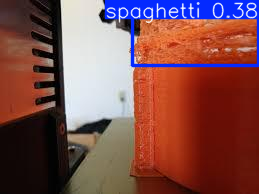

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/3d printing defects /Detection/runs/detect/train/weights/best.pt')

# Perform detection on a new image
results = model('/content/drive/MyDrive/3d printing defects /ooo/00de824e-images290_jpg.rf.5ee08c9fdba4f0e40ff2310f2a567a48.jpg')

# Visualize the results (access the first result from the list)
results[0].show()


## Batch Detection with Metrics Display

Description: This script performs object detection on multiple images, visualizes the results, and prints detailed metrics such as object class, confidence score, and bounding box coordinates for each detected object in the images.

In [ ]:
import os
from ultralytics import YOLO
import cv2

# Load the trained model
model = YOLO('/content/drive/MyDrive/3d printing defects /Detection/runs/detect/train/weights/best.pt')

# Specify the path to the folder containing images
image_folder = '/content/drive/MyDrive/3d printing defects /ooo'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Perform detection on each image and visualize the results with metrics
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    # Perform detection
    results = model(image_path)

    # Visualize the results (access the first result from the list)
    results[0].show()

    # Display additional metrics for each detected object in the image
    print(f"Processing image: {image_file}")
    for result in results:
        print(f"Detected {len(result)} objects in {image_file}")
        for box in result.boxes:
            # Access the bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0].tolist()

            # Access the class label
            cls = int(box.cls[0])
            label = model.names[cls]

            # Access the confidence score
            confidence = box.conf[0].item()

            # Print the metrics
            print(f"Object: {label}, Confidence: {confidence:.2f}")
            print(f"Bounding Box: ({x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f})")

    print("-" * 50)  # Separator for clarity between images


Output hidden; open in https://colab.research.google.com to view.